In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression

plt.show()

In [2]:
df = pd.read_csv('/Users/mbair/Git/ConvexOptimizationWithPython/Data/Gas-Prices.csv', sep = ',')
print(df.isnull().sum())
print()
# Remove rows with null - the data is fairly uninformative in its current state so replacing null values with anything at this point is not going to help with later analysis
df.dropna(axis=0, how='any', inplace=False)
df.info()

OBS      0
INC      0
PALL     0
PGAS     0
PNCAR    0
PPUB     0
PUCAR    0
SGAS     0
X2       0
X3       0
X4       0
X5       0
X6       0
Y        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
OBS      30 non-null int64
INC      30 non-null float64
PALL     30 non-null float64
PGAS     30 non-null float64
PNCAR    30 non-null float64
PPUB     30 non-null float64
PUCAR    30 non-null float64
SGAS     30 non-null int64
X2       30 non-null float64
X3       30 non-null float64
X4       30 non-null float64
X5       30 non-null float64
X6       30 non-null float64
Y        30 non-null float64
dtypes: float64(12), int64(2)
memory usage: 3.4 KB


In [3]:
df.head()

,OBS,INC,PALL,PGAS,PNCAR,PPUB,PUCAR,SGAS,X2,X3,X4,X5,X6,Y
0,1970,736.5,38.8,35.074478,53.0,35.2,31.2,28903,2.943489,-0.100947,-0.097374,0.311872,-0.218002,6.714227
1,1971,801.7,40.5,35.306979,55.2,37.8,33.0,30620,2.985432,-0.137221,-0.068993,0.309661,-0.204794,6.765328
2,1972,868.6,41.8,35.738767,54.7,39.3,33.1,33072,3.033986,-0.156660,-0.061672,0.268967,-0.233363,6.830206
3,1973,979.0,44.4,39.226286,54.8,39.7,35.2,36942,3.093292,-0.123892,-0.111888,0.210451,-0.232193,6.847757
4,1974,1072.3,49.3,53.109934,57.9,40.6,36.7,43054,3.079637,0.074440,-0.194156,0.160793,-0.295147,6.697846


In [4]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
OBS,30.0,1984.0,9.0,1970.0,1977.0,1984.0,1992.0,1999.0
INC,30.0,3172.0,1845.0,736.0,1481.0,2987.0,4685.0,6639.0
PALL,30.0,102.0,42.0,39.0,62.0,106.0,139.0,167.0
PGAS,30.0,96.0,34.0,35.0,63.0,114.0,121.0,135.0
PNCAR,30.0,101.0,31.0,53.0,72.0,104.0,128.0,142.0
PPUB,30.0,107.0,55.0,35.0,50.0,108.0,151.0,198.0
PUCAR,30.0,95.0,43.0,31.0,55.0,111.0,122.0,157.0
SGAS,30.0,102212.0,46876.0,28903.0,57451.0,103920.0,138202.0,180973.0
X2,30.0,3.0,0.0,3.0,3.0,3.0,4.0,4.0
X3,30.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0


## We are interested, among other things, in the price elacticity of gasoline consumption.

### Question 1: Regress lg(SGAS) on lg(PGAS).

In [5]:
y = np.log(df['SGAS'])
x = np.log(df[['PGAS']])

In [6]:
clf = LinearRegression()
clf.fit(x.values,y.values)
print('Logarithm of Gasoline Retail Price')
print(clf.coef_)
print()
print('Intercept:')
print(clf.intercept_)

Logarithm of Gasoline Retail Price
[1.19513055]

Intercept:
6.046774170755111


### Is that what we are intersted in?
Definition of SGAS is retail sales gasoline in 10^6 dollars
Definition of PGAS is gasoline retail price in cents per gallon.

As we are interested in the price elasticity of gasoline consumption, this tells us the percent change in retail sales of gasoline (in 10^6 dollars) given a percent change in gasoline retail price (in cents per gallon). The interpretation of a log-log model is a percent change in y given a percent change in x (times the coefficient).

Price elasticity of demand involves the change in quantity demanded and the price of the good demanded.

So, **no**, this tells us the price elasticity of gasonline consumption GIVEN the price at the pump. There is no aspect of quantity in this model

### Question 2: Regress y on lg(PGAS).

In [7]:
y = np.log(df['SGAS'] / df['PGAS'])
x = np.log(df[['PGAS']])

In [8]:
clf = LinearRegression()
clf.fit(x.values,y.values)
print('Logarithm of Gasoline Retail Price')
print(clf.coef_)
print()
print('Intercept:')
print(clf.intercept_)

Logarithm of Gasoline Retail Price
[0.19513055]

Intercept:
6.046774170755112


### Why is this misleading?
This is a log-log interpretation again, with Y being defined as the log of the ratio of retail sales of gasoline in 10^6 dollars to the gasoline retail price.

This is misleading as the units are not standard and the terms are in nominal and real

Statistically, this is misleading as the Y variable is composed of some of the X variable, and thus there is certainly an endogeneity issue. Mathematically, this is odd as we aren't really "solving" for anything, and if we are, we're solving it in terms of itself. More particularly, there is an issue of relating nominal and real values.

### Question 3: Regress y on x2 and x3.

In [9]:
y = np.log(df['SGAS'] / df['PGAS'])
x = df[['X2', 'X3']]

In [10]:
clf = LinearRegression()
clf.fit(x.values,y.values)
print('log(INC/PALL), log(INC/PALL)')
print(clf.coef_)
print()
print('Intercept:')
print(clf.intercept_)

log(INC/PALL), log(INC/PALL)
[ 0.57322022 -0.52757783]

Intercept:
4.9859972129091865


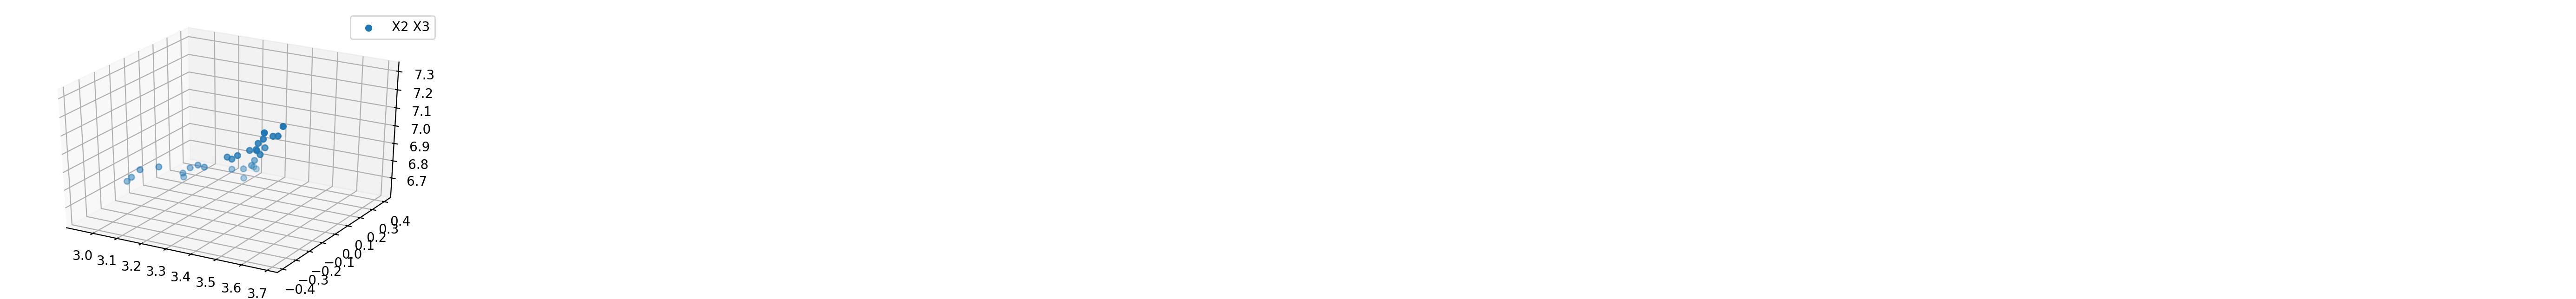

In [11]:
fig = plt.figure(dpi= 200)
ax = fig.gca(projection='3d')
z = y
x = df['X2']
y = df['X3']
ax.scatter(x, y, z, zdir='z', label='X2 X3')
ax.legend()
fig.savefig('fig.png',dpi=600)

plt.show()

### Provide some motivation for this choice.

### Question 4: Regress y on X2, X3, X4, X5, and X6.

In [12]:
y = np.log(df['SGAS'] / df['PGAS'])
x = df[['X2', 'X3', 'X4', 'X5', 'X6']]

In [13]:
clf = LinearRegression()
clf.fit(x.values,y.values)
print('X2 = log(INC/PALL), X3 = log(PGAS/PALL), X4 = log(PPUB/PALL), X5 = log(PNCAR/PALL), X6 = log(PUCAR/PALL)')
print(clf.coef_)
print()
print('Intercept:')
print(clf.intercept_)

X2 = log(INC/PALL), X3 = log(PGAS/PALL), X4 = log(PPUB/PALL), X5 = log(PNCAR/PALL), X6 = log(PUCAR/PALL)
[ 0.86605094 -0.43960435  0.03351302  0.39028831 -0.09466594]

Intercept:
3.992342363706894


### Compare your result to 3.